# Seaborn: PairGrid

In [1]:
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
plt.rc('axes', labelsize = 14)
plt.rc('xtick', labelsize = 12)
plt.rc('ytick', labelsize = 12)

## Basics

In [25]:
sns.set_style('darkgrid')

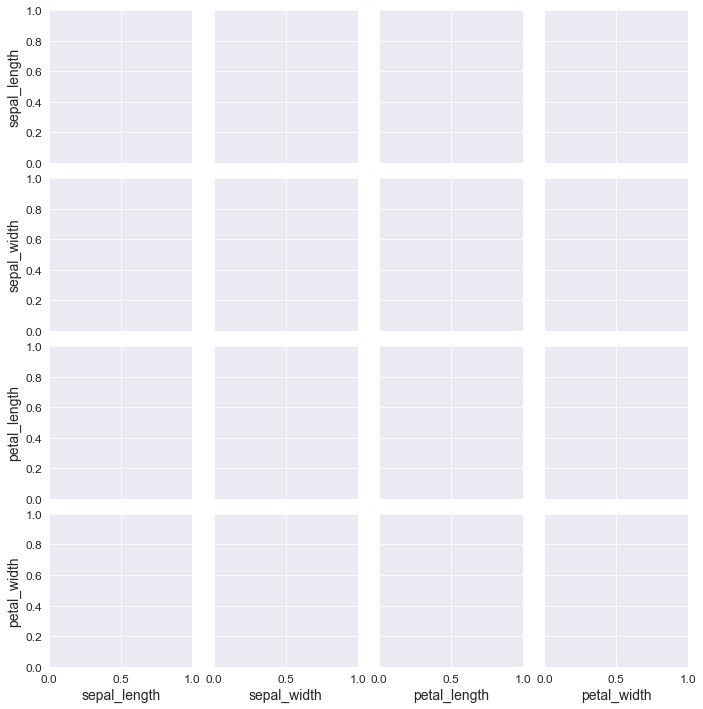

In [29]:
g = sns.PairGrid(iris);

In [30]:
type(g)

seaborn.axisgrid.PairGrid

### `.map()`

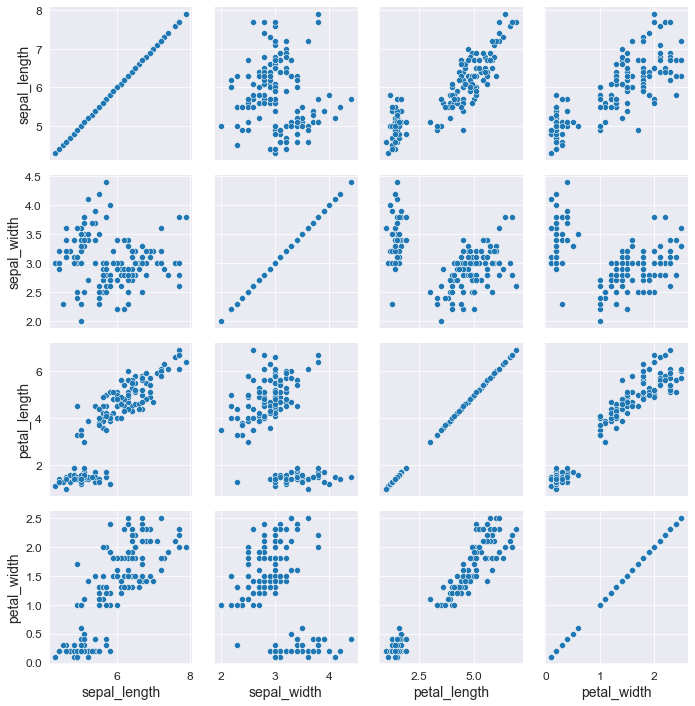

In [34]:
g = sns.PairGrid(iris)
g.map(sns.scatterplot);   # any idea why we are seeing a line in the diagonal?

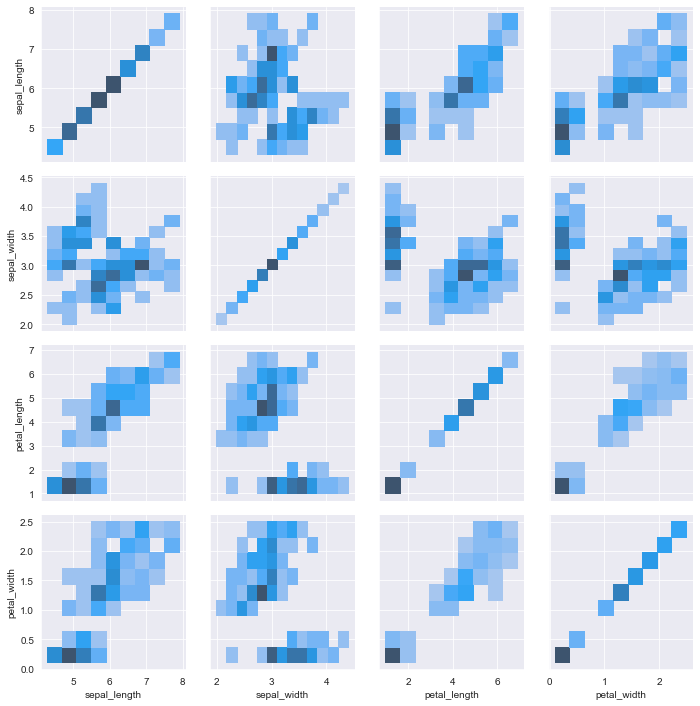

In [8]:
g = sns.PairGrid(iris)
g.map(sns.histplot); # can pairplot do this? 

### Matplotlib Functions

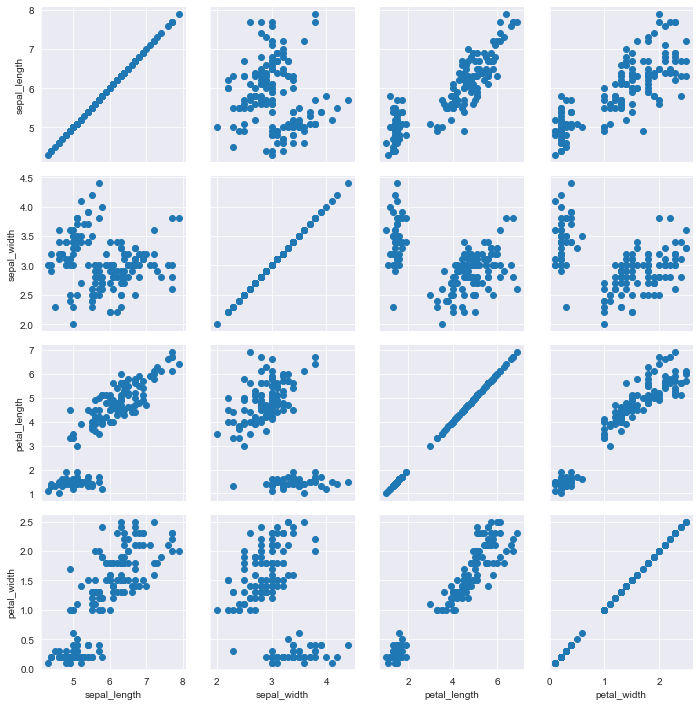

In [9]:
g = sns.PairGrid(iris)
g.map(plt.scatter); # can pairplot do this?

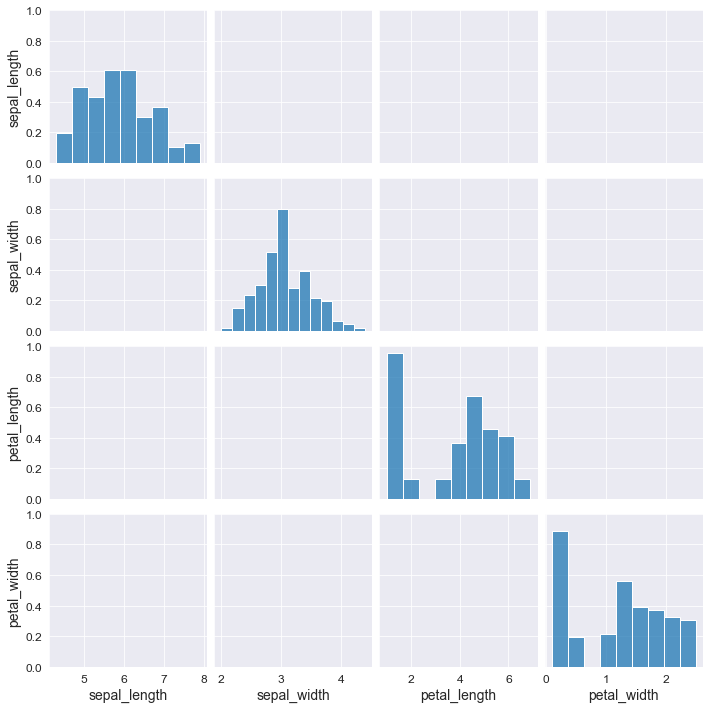

In [36]:
sns.pairplot(iris, kind = 'boxplot') # check the kind argument as well as the diag_kind

## PairGrid Anatomy

### `.map_diag()` and `.map_offdiag()`

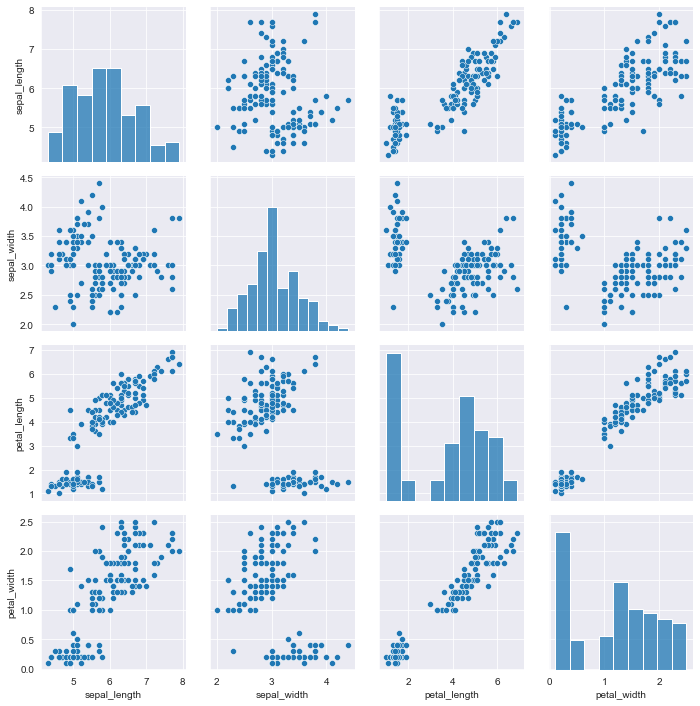

In [10]:
g = sns.PairGrid(iris)
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot);

Do we have any redundancy in the figure above?

### `.map_upper()` and `.map_lower()`

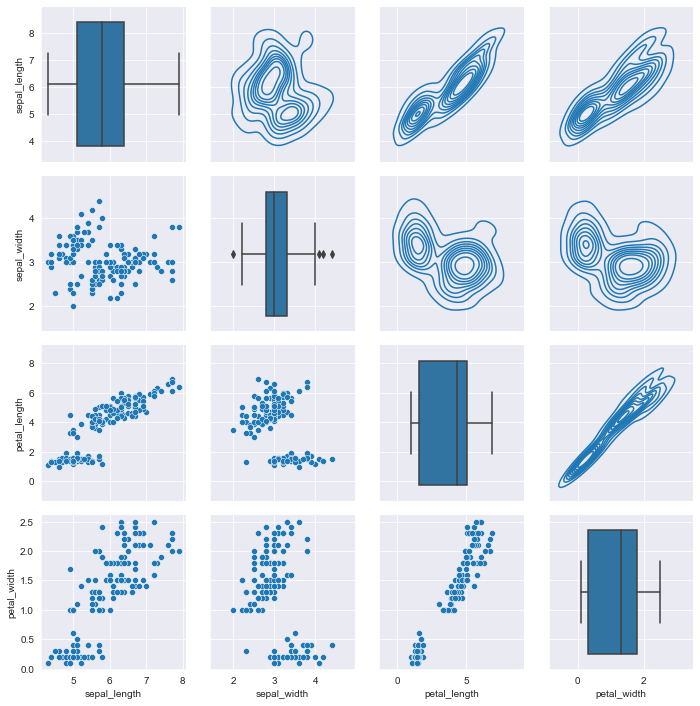

In [11]:
g = sns.PairGrid(iris)
g.map_lower(sns.scatterplot)
g.map_diag(sns.boxplot)
g.map_upper(sns.kdeplot);  
# can pairplot use more than one plot per figure? - recheck documentation

### `corner`

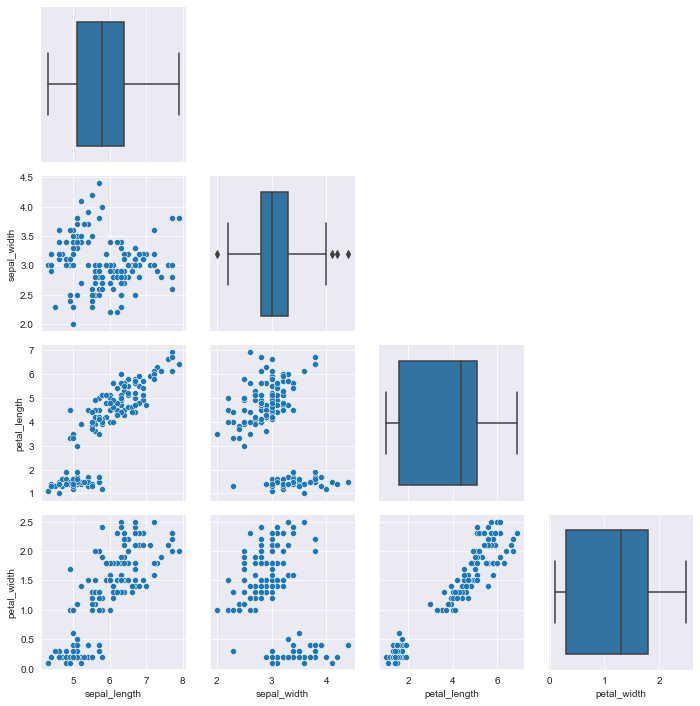

In [12]:
g = sns.PairGrid(iris, corner=True)
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.boxplot);

## Additional Options

### `hue`

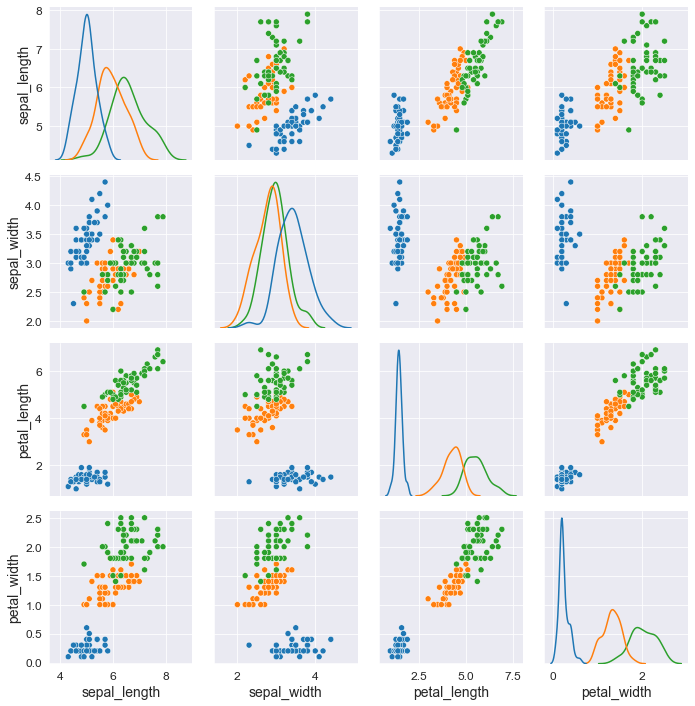

In [37]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False) # what if we removed diag_sharey?
g.map_diag(sns.kdeplot) 
g.map_offdiag(sns.scatterplot);

### `vars`

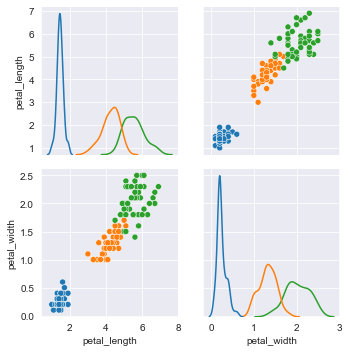

In [14]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False, vars=['petal_length', 'petal_width'])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot);

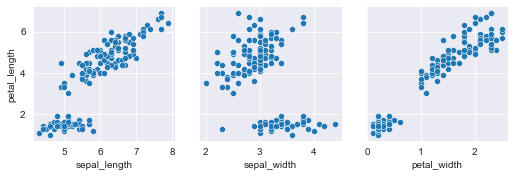

In [15]:
g = sns.PairGrid(iris,  
                 x_vars=['sepal_length', 'sepal_width', 'petal_width'],
                 y_vars=['petal_length']
                )
g.map(sns.scatterplot);

## Styling

### Plot-specific Keywords

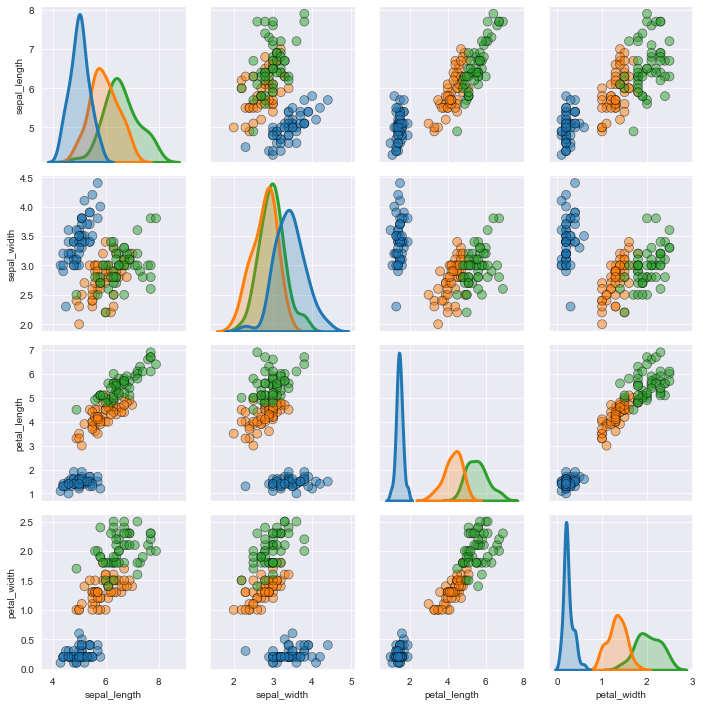

In [16]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False)
g.map_diag(sns.kdeplot, fill=True, lw=3)
g.map_offdiag(sns.scatterplot, s=80, alpha=.5, ec='black'); # how to get these arguemnts?  
# can we chance edge color (ec) ? 

### `height`, `aspect`

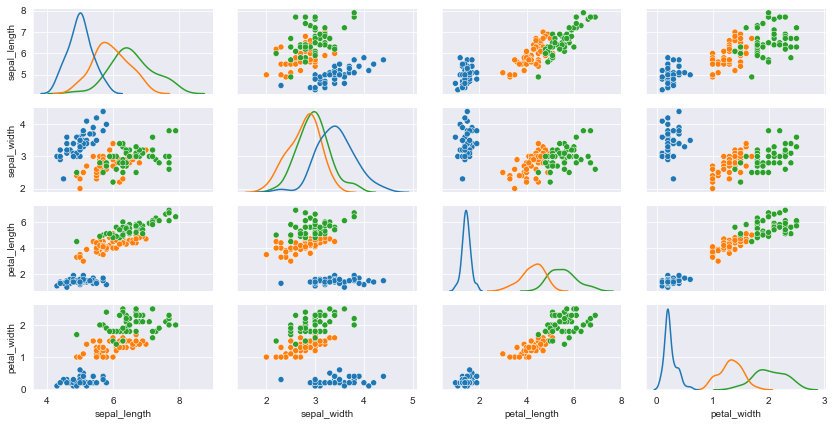

In [17]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False, height=1.5, aspect=2)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot);

### `palette`

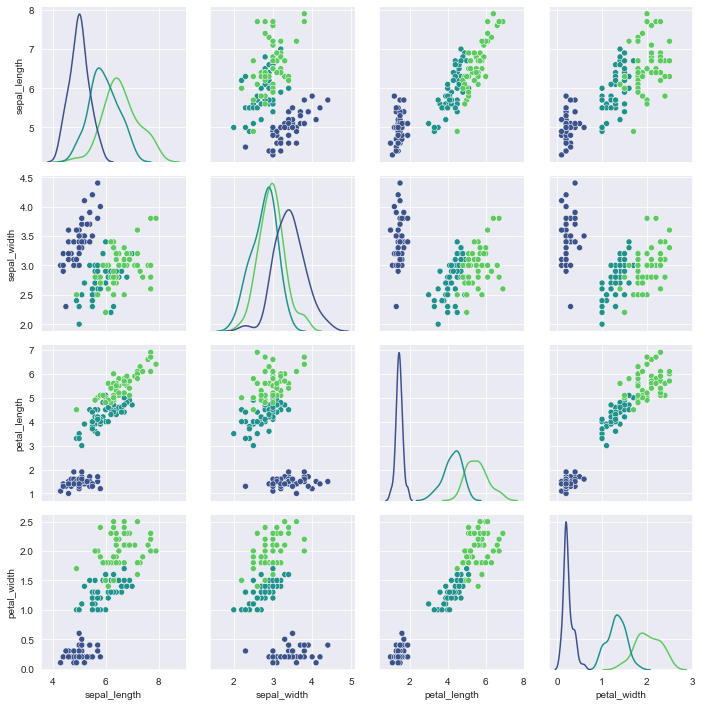

In [18]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False, palette='viridis')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot);

### `.add_legend()`

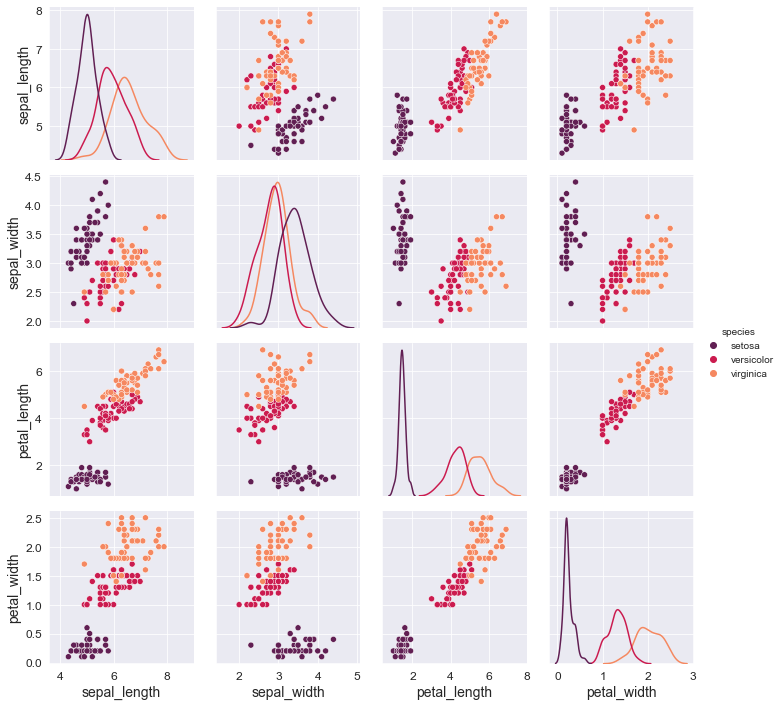

In [38]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False, palette='viridis')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)
g.add_legend();

In [39]:
g.palette    #g. + TAB shows you methods and properties of the PairGrid

[(0.38092887, 0.12061482, 0.32506528),
 (0.7965014, 0.10506637, 0.31063031),
 (0.95922872, 0.53307513, 0.3748895)]

## Thumbnail and Overlays

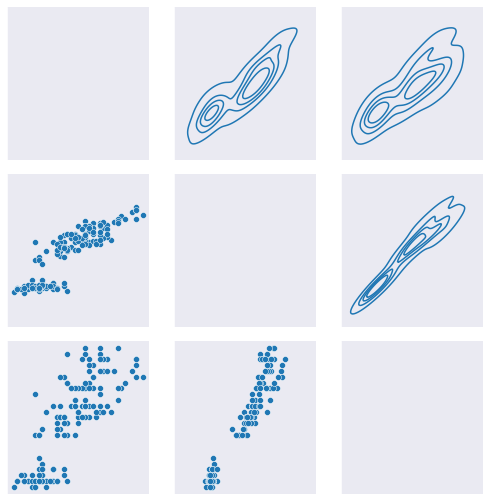

In [21]:
g = sns.PairGrid(iris, vars=['sepal_length','petal_length', 'petal_width'], diag_sharey=False)
#g.map_diag(sns.histplot)
#g.map_offdiag(sns.scatterplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot, n_levels=5)
for var in g.axes:
    for ax in var:
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])
#g.savefig('23pairgrid_image_blank.png', dpi=200)
#g.savefig('23pairgrid_image_maindiag.png', dpi=200)
#g.savefig('23pairgrid_image_offdiag.png', dpi=200)
#g.savefig('23pairgrid_image_differentdiag.png', dpi=200)

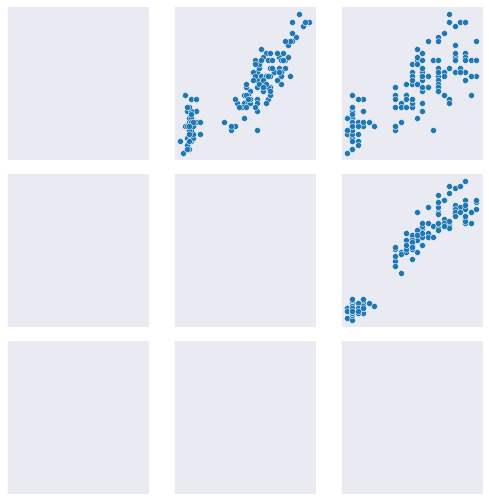

In [22]:
g = sns.PairGrid(iris, vars=['sepal_length','petal_length', 'petal_width'], diag_sharey=False)
#g.map_lower(sns.scatterplot)
g.map_upper(sns.scatterplot)
for var in g.axes:
    for ax in var:
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])
#g.savefig('23pairgrid_image_lowertri.png', dpi=200)
#g.savefig('23pairgrid_image_uppertri.png', dpi=200)

### Thumbnail

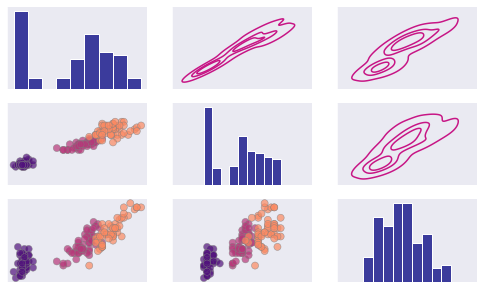

In [23]:
g = sns.PairGrid(iris, 
                 hue='species', 
                 palette='magma', 
                 vars=['petal_length', 'petal_width', 'sepal_length'], 
                 height=1.5, 
                 aspect=1.65, 
                 diag_sharey=False
                )
g.map_lower(sns.scatterplot, s=50, alpha=0.7, ec='gray')
g.map_diag(sns.histplot,hue=None, color='navy')
g.map_upper(sns.kdeplot, n_levels=4,hue=None, color='mediumvioletred')
for var in g.axes:
    for ax in var:
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])
#g.savefig('23pairgrid_image_thumb.png', dpi=200);